In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
apple_df = pd.read_csv("../datasets/AAPL.csv")

In [3]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [6]:
apple_high_unproc = apple_df.iloc[:, 2:3].values

In [7]:
apple_features_unproc = apple_df.iloc[:, 1:-1].values

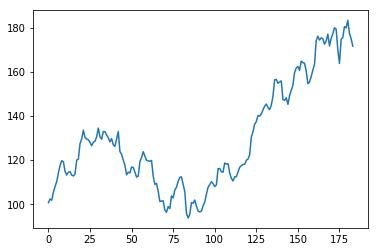

In [8]:
plt.plot(apple_high_unproc)

In [9]:
print("max", apple_high_unproc.max())
print("min", apple_high_unproc.min())

max 183.5
min 93.769997


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
apple_high_proc = scaler.fit_transform(apple_high_unproc)

In [14]:
apple_features_proc = scaler.transform(apple_features_unproc)

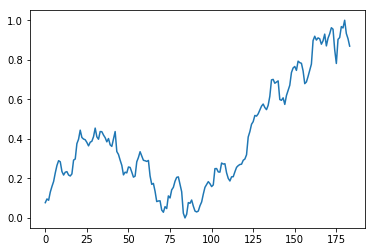

In [15]:
plt.plot(apple_high_proc)

In [16]:
print("max", apple_high_proc.max())
print("min", apple_high_proc.min())

max 1.0
min 0.0


In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [34]:
generator = TimeseriesGenerator(apple_features_proc, apple_high_proc, length=15, batch_size=40)

In [35]:
X, y = generator[0]

In [36]:
X[:4]

array([[[ 0.07600578,  0.0771203 ,  0.04758725,  0.06519565,
         -0.00284974],
        [ 0.06887328,  0.09595453,  0.05059624,  0.0775661 ,
          0.00876236],
        [ 0.08425281,  0.08926782,  0.01571384,  0.04346373,
         -0.0232498 ],
        [ 0.05070771,  0.13061407,  0.04959327,  0.12760508,
          0.05573437],
        [ 0.12348156,  0.15903269,  0.12180987,  0.1585869 ,
          0.08481755],
        [ 0.16103871,  0.18421939,  0.15546644,  0.16984291,
          0.09538358],
        [ 0.1699543 ,  0.22757165,  0.16304474,  0.22746018,
          0.15464925],
        [ 0.22846316,  0.26524019,  0.21765302,  0.2529812 ,
          0.17870978],
        [ 0.2572161 ,  0.2895353 ,  0.25465291,  0.28039677,
          0.20455662],
        [ 0.2790594 ,  0.28396302,  0.19502953,  0.23659871,
          0.16326478],
        [ 0.2265686 ,  0.23492701,  0.17363201,  0.177867  ,
          0.10789364],
        [ 0.18867714,  0.21698429,  0.13919541,  0.20071327,
          0.129

In [37]:
y[:4]

array([[0.21208075],
       [0.22266803],
       [0.29232143],
       [0.29800517]])

In [38]:
apple_high_proc[:20]

array([[0.0771203 ],
       [0.09595453],
       [0.08926782],
       [0.13061407],
       [0.15903269],
       [0.18421939],
       [0.22757165],
       [0.26524019],
       [0.2895353 ],
       [0.28396302],
       [0.23492701],
       [0.21698429],
       [0.2312493 ],
       [0.23403543],
       [0.21709576],
       [0.21208075],
       [0.22266803],
       [0.29232143],
       [0.29800517],
       [0.37568266]])

In [39]:
from keras.layers import Input, LSTM, Dense, Dropout
from keras.models import Model

In [40]:
in_layer = Input(shape=(15, 5))
lstm_1 = LSTM(units=50, return_sequences=True)(in_layer)
lstm_2 = LSTM(units=50)(lstm_1)
d1 = Dense(10, activation="linear")(lstm_2)
out = Dense(1, activation="linear")(d1)

In [41]:
model = Model(in_layer, out)

In [42]:
model.compile(optimizer="adam", loss="mse")

In [43]:
model.fit_generator(generator, steps_per_epoch=50, epochs=10)

Epoch 1/10
50/50 [==============================] - 2s 37ms/step - loss: 0.0301
Epoch 2/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0058
Epoch 3/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0056
Epoch 4/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0052
Epoch 5/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0048
Epoch 6/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0047
Epoch 7/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0044
Epoch 8/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 9/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0040
Epoch 10/10
50/50 [==============================] - 1s 20ms/step - loss: 0.0036


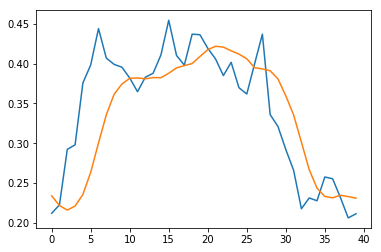

In [44]:
plt.plot(generator[0][1])
plt.plot(model.predict(generator[0][0]))